In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List, Dict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

songs=pd.read_csv("songdata.csv")
songs.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [2]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [3]:
songs.describe()

,artist,song,link,text
count,57650,57650,57650,57650
unique,643,44822,57650,57494
top,Donna Summer,Have Yourself A Merry Little Christmas,/a/abba/ahes+my+kind+of+girl_20598417.html,I just came back from a lovely trip along the ...
freq,191,35,1,6


In [4]:
songs.dropna(inplace=True)
songs.drop_duplicates(inplace=True)
songs['text'] = songs['text'].str.lower()

In [5]:
songs=songs.sample(n=3000)
songs = songs.drop('link', axis=1)
songs=songs.reset_index(drop=True)

In [6]:
col = songs['text']
col=col.str.replace(r'\n', '')
songs['text'] = col

In [7]:
tfidf = TfidfVectorizer(analyzer='word', stop_words='english')
matrix = tfidf.fit_transform(songs['text'])
print(matrix)

  (0, 17985)	0.07123440572189765
  (0, 1976)	0.0930031735104322
  (0, 18326)	0.04006880897768201
  (0, 5054)	0.06388705660464473
  (0, 16376)	0.03601972782153688
  (0, 15215)	0.05894430290638129
  (0, 10249)	0.03334640202563114
  (0, 9961)	0.04304335555731694
  (0, 11531)	0.08241841085232307
  (0, 7846)	0.0468331948483963
  (0, 11989)	0.10881678326325309
  (0, 9448)	0.031691629340237074
  (0, 4731)	0.020623430562346074
  (0, 18278)	0.08275268985956151
  (0, 7696)	0.041485440045644355
  (0, 13157)	0.08846726223567747
  (0, 9217)	0.06198640734738576
  (0, 12320)	0.08275268985956151
  (0, 7209)	0.07749479042890897
  (0, 1977)	0.08846726223567747
  (0, 15814)	0.08071307069491584
  (0, 9582)	0.08071307069491584
  (0, 18072)	0.06974059888814738
  (0, 7971)	0.07898859726265926
  (0, 5773)	0.17693452447135494
  :	:
  (2999, 7620)	0.046028614640214315
  (2999, 6801)	0.09603929246224505
  (2999, 9298)	0.029418068323129792
  (2999, 1039)	0.07605206246547383
  (2999, 9520)	0.17514365794308023
  (2

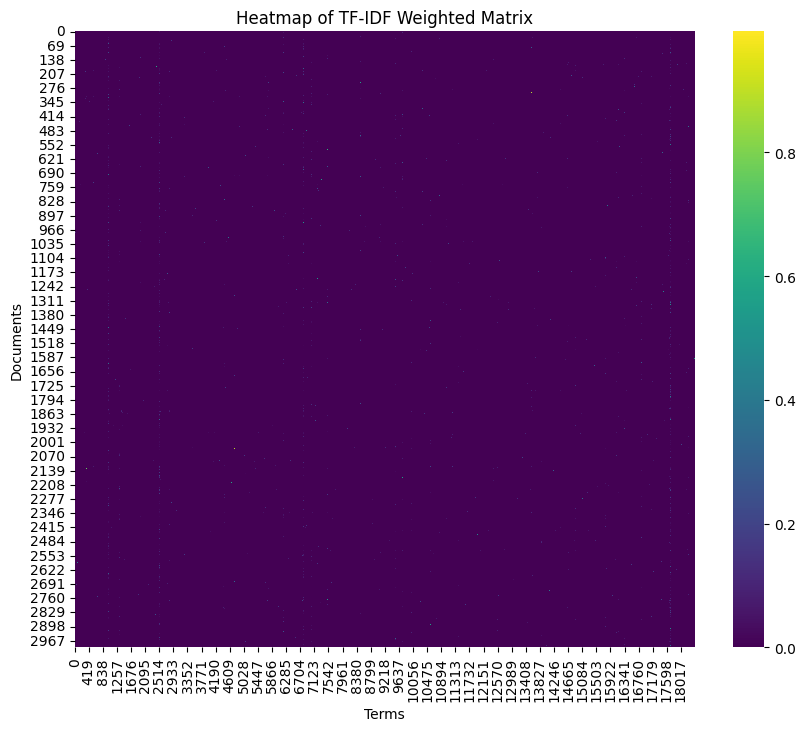

In [8]:
matrix_array = matrix.toarray()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matrix_array, cmap='viridis')
plt.title('Heatmap of TF-IDF Weighted Matrix')
plt.xlabel('Terms')
plt.ylabel('Documents')
plt.show()

In [9]:
cosineSim = cosine_similarity(matrix)
similar = {}

for i in range(len(cosineSim)):
    similarIndex = cosineSim[i].argsort()[:-50:-1]
    similarItems = []
    for x in similarIndex:
        if x != i:
            similarItems.append((cosineSim[i][x], songs['song'][x], songs['artist'][x]))

    similar[songs['song'].iloc[i]] = similarItems

print(cosineSim)

[[1.00000000e+00 2.90837477e-02 2.48151202e-02 ... 8.77456357e-03
  1.92978117e-02 5.93931153e-02]
 [2.90837477e-02 1.00000000e+00 1.42225248e-01 ... 8.98646324e-04
  8.40315202e-02 1.32055557e-01]
 [2.48151202e-02 1.42225248e-01 1.00000000e+00 ... 4.15453966e-03
  3.43522425e-02 4.33837605e-02]
 ...
 [8.77456357e-03 8.98646324e-04 4.15453966e-03 ... 1.00000000e+00
  1.13492055e-02 4.92594487e-03]
 [1.92978117e-02 8.40315202e-02 3.43522425e-02 ... 1.13492055e-02
  1.00000000e+00 1.59395828e-01]
 [5.93931153e-02 1.32055557e-01 4.33837605e-02 ... 4.92594487e-03
  1.59395828e-01 1.00000000e+00]]


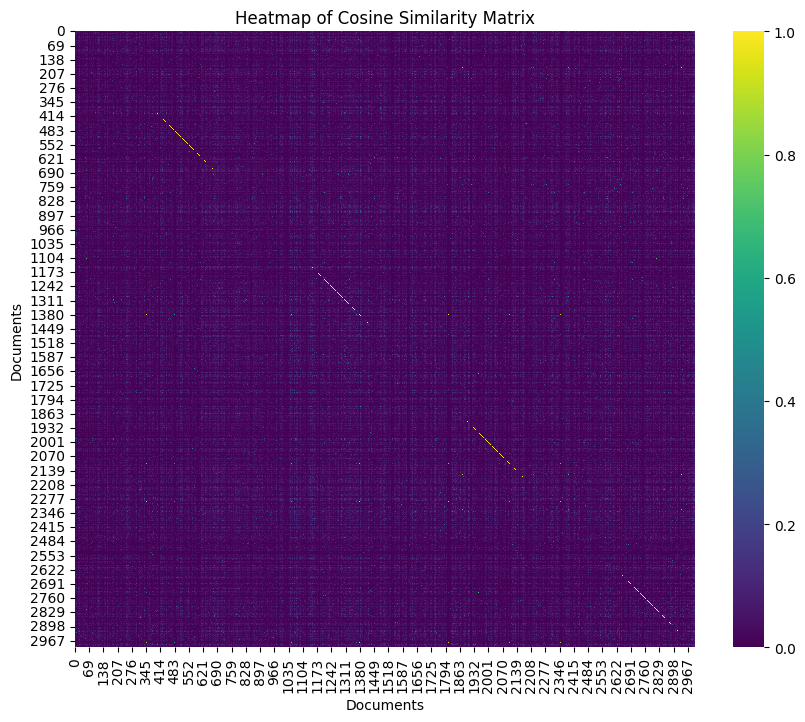

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(cosineSim, cmap='viridis')
plt.title('Heatmap of Cosine Similarity Matrix')
plt.xlabel('Documents')
plt.ylabel('Documents')
plt.show()

In [11]:
def recommendedSongs(song, recom_song):
    rec_items = len(recom_song)

    print(f'The {rec_items} recommended songs for {song} are:')
    for i in range(rec_items):
        print(f"Number {i+1}:")
        print(f"{recom_song[i][1]} by {recom_song[i][2]} with {round(recom_song[i][0], 3)} similarity score")
        print("--------------------")

def recommend(matrix_similar, recommendation):
    song = recommendation['song']
    number_songs = recommendation['number_songs']
    recom_song = matrix_similar[song][:number_songs]
    recommendedSongs(song=song, recom_song=recom_song)

In [12]:
recommendation = {
    "song": songs['song'].iloc[10],
    "number_songs": 4
}
recommend(similar,recommendation)

The 4 recommended songs for Gangsta Like Me are:
Number 1:
Gangsta Luv by Snoop Dogg with 0.265 similarity score
--------------------
Number 2:
I Got Some Money On Me by Lil Wayne with 0.238 similarity score
--------------------
Number 3:
Deez Hollywood Nights by Snoop Dogg with 0.238 similarity score
--------------------
Number 4:
Double Up by R. Kelly with 0.189 similarity score
--------------------
